In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
from tensorflow.keras.utils import to_categorical
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 177kB/s eta 0:00:01     |████▉                           | 16.4MB 25.7MB/s eta 0:00:04     |███████████████▊                | 53.8MB 1.6MB/s eta 0:00:36     |█████████████████▎              | 59.1MB 1.6MB/s eta 0:00:33     |██████████████████▌             | 63.3MB 1.6MB/s eta 0:00:30
     |████████████████████████████████| 491kB 34.2MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 36.1MB/s eta 0:00:01
ERROR: tensorflow-gpu 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: tensorflow-gpu 2.0.0 has requirement tensorflow-estimator<2.1.0,>=2.0.0, but you'll have tensorflow-estimator 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.0.0
    Uninstalling tensorflow-estimator-2.0.0:
      Successfully uninstalled tensorflow-estimator-2.0.0
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Succe

In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as f:
        reader = csv.reader(f, delimiter=',')
        next(reader, None)

        labels = []
        images = []

        for row in reader:
            label = int(row[0])
            image = np.array(np.reshape(row[1:], (28,28)), dtype= np.int64)/255.0
            labels.append(label)
            images.append(image)
    
    return np.array(images), np.array(labels)

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [11]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis =-1)
testing_images = np.expand_dims(testing_images, axis =-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator()


# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [12]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(25, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, to_categorical(training_labels), batch_size = 64),
                              epochs=2,
                              steps_per_epoch=275,
                              validation_data = (testing_images, to_categorical(testing_labels)),
                              verbose=1)

model.evaluate(testing_images, to_categorical(testing_labels), verbose=1)

Epoch 1/2
275/275 [==============================] - 21s 78ms/step - loss: 1.5118 - categorical_accuracy: 0.6024 - val_loss: 0.8483 - val_categorical_accuracy: 0.7694
Epoch 2/2
275/275 [==============================] - 21s 77ms/step - loss: 0.3773 - categorical_accuracy: 0.9473 - val_loss: 0.5132 - val_categorical_accuracy: 0.8752
7172/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.515319929116941, 0.87520915]

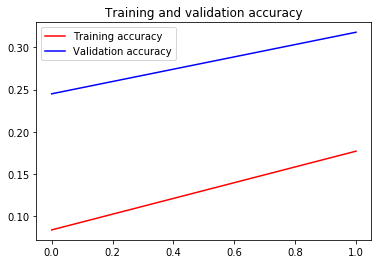

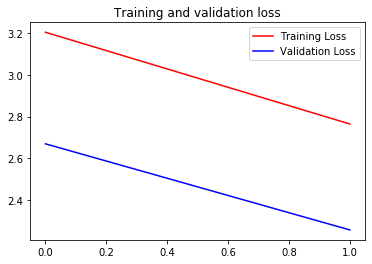

In [5]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [6]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 